In [1]:

# Graph analysis is a field of study and a set of techniques used to analyze and understand the relationships and structures within graph data. 
# Graphs, consisting of nodes (vertices) and edges (links), are used to model pairwise relationships between entities. This type of analysis is 
# particularly powerful in revealing insights about complex, interconnected systems.

# Key components and techniques of graph analysis include:

#  Graph Representation:
#  Nodes/Vertices: Represent entities such as people, places, or objects.
#  Edges/Links: Represent relationships or interactions between entities.

#  Types of Graphs:
#  Directed vs. Undirected Graphs: Directional edges indicate one-way relationships, while undirected edges indicate bidirectional relationships.
#  Weighted vs. Unweighted Graphs: Weighted edges carry a value indicating the strength or capacity of the relationship.

#  Analytical Techniques:
#  Centrality Measures: Identify the most important nodes in a graph (e.g., degree centrality, betweenness centrality).
#  Community Detection: Discover clusters or groups of nodes that are more densely connected to each other than to the rest of the network.
#  Link Prediction: Predict future connections between nodes based on existing network structure.
#  Graph Traversal: Explore the nodes of a graph in a systematic way (e.g., depth-first search, breadth-first search).

#  Common Applications:
#  Social Network Analysis: Studying relationships and interactions within social networks.
#  Fraud Detection: Identifying unusual patterns in transaction or interaction networks that could indicate fraudulent activity.
#  Recommendation Systems: Suggesting items or connections based on user behavior and preferences.
#  Anomaly Detection: Finding nodes or edges that deviate significantly from the norm.
#  Pathfinding and Network Optimization: Identifying the shortest paths, optimizing routes, and improving network efficiency.


In [10]:

# Detect Fraud on a Social Network

# In social networks, fraudulent activity often involves unusual patterns of connections or interactions. Graph analytics can help detect these patterns.
# Example: Detecting Fraud Rings

# A fraud ring might involve multiple accounts created to like or follow each other to inflate metrics or deceive other users. To detect such 
# patterns, you can use community detection algorithms and link prediction.


import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes (users)
G.add_nodes_from(["UserA", "UserB", "UserC", "UserD", "UserE"])

# Add edges (connections)
G.add_edges_from([("UserA", "UserB"), ("UserA", "UserC"), ("UserB", "UserC"),
                  ("UserC", "UserD"), ("UserD", "UserE"), ("UserE", "UserA")])

# Detect communities
communities = nx.algorithms.community.greedy_modularity_communities(G)

for community in communities:
    print("Detected community:", community)

# Define suspicious criteria
suspicious_threshold = 2  # Threshold for community size

# Identify suspicious communities
suspicious_communities = [community for community in communities if len(community) > suspicious_threshold]

# Output suspicious communities
if suspicious_communities:
    print("Suspicious communities detected:")
    for community in suspicious_communities:
        print(community)
else:
    print("No suspicious communities detected.")
        

Detected community: frozenset({'UserC', 'UserB', 'UserA'})
Detected community: frozenset({'UserD', 'UserE'})
Suspicious communities detected:
frozenset({'UserC', 'UserB', 'UserA'})


In [ ]:

# So, {'UserC', 'UserB', 'UserA'} are considered to be suspicious because they show up in >2 communities. Perhaps these are face user accounts.
# In other scenarios, you could define more meaningful criteria for what constitutes suspicious behavior, which could include factors such as the 
# frequency and nature of interactions within the community, the presence of certain keywords or patterns in communications, or other relevant 
# indicators of potentially fraudulent or suspicious activity.


In [18]:

# Detect Credit Card Fraud

# Credit card fraud detection can involve analyzing the transaction graph for unusual patterns, such as transactions with merchants that are not 
# typically visited by the user.
# Example: Unusual Spending Patterns


import pandas as pd
import networkx as nx

# Sample transaction data
data = {
    'User': ['User1', 'User2', 'User1', 'User3', 'User1', 'User2'],
    'Merchant': ['Merchant1', 'Merchant2', 'Merchant3', 'Merchant1', 'Merchant2', 'Merchant3'],
    'Amount': [100, 150, 200, 300, 500, 4000]
}
df = pd.DataFrame(data)

# Create a bipartite graph
G = nx.Graph()

# Add nodes and edges
for index, row in df.iterrows():
    G.add_node(row['User'], bipartite=0)
    G.add_node(row['Merchant'], bipartite=1)
    G.add_edge(row['User'], row['Merchant'], weight=row['Amount'])

# Analyze the bipartite graph for unusual spending patterns
for u, v, attributes in G.edges(data=True):
    if attributes['weight'] > 400:  # Arbitrary threshold for unusual spending
        print(f"Unusual spending pattern detected between {u} and {v} with amount {attributes['weight']}")
            

Unusual spending pattern detected between User1 and Merchant2 with amount 500
Unusual spending pattern detected between User2 and Merchant3 with amount 4000


In [20]:

# Make Recommendations to Users

# Graph-based recommendation systems can use collaborative filtering, where you recommend items based on user similarity or item similarity.
# Example: Item-Based Collaborative Filtering


import networkx as nx
from networkx.algorithms import bipartite

# Sample user-item interactions with more descriptive names
interactions = [
    ("Tom", "Dish Soap"), ("Tom", "Laundry Detergent"), ("Dennis", "Laundry Detergent"),
    ("Dennis", "Fabric Softener"), ("Tim", "Dish Soap"), ("Tim", "Fabric Softener")
]

# Create a bipartite graph
B = nx.Graph()
B.add_edges_from(interactions)

# Project the graph to focus on items
item_projection = bipartite.weighted_projected_graph(B, ["Dish Soap", "Laundry Detergent", "Fabric Softener"])

# Recommend items based on item similarity
def recommend_items(user, user_items):
    recommendations = {}
    for item in user_items:
        neighbors = item_projection.neighbors(item)
        for neighbor in neighbors:
            if neighbor not in user_items:
                if neighbor not in recommendations:
                    recommendations[neighbor] = 0
                recommendations[neighbor] += 1  # Weight can be adjusted based on similarity
    return recommendations

# User's current items
user_items = ["Dish Soap"]

# Get recommendations for User1
recommendations = recommend_items("Tom", user_items)
print("Recommendations for Tom:", recommendations)


Recommendations for Tom: {'Fabric Softener': 1, 'Laundry Detergent': 1}


In [25]:

# The code below is somewhat imilar to the recommendation system above, but in this example we are using Content Based Filtering. 

import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Construct the graph
G = nx.Graph()

# 2. Extract features and add nodes to the graph
items = ["Dish Soap", "Laundry Detergent", "Fabric Softener"]  # List of items
# Convert item names to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(items)
# Add nodes to the graph with TF-IDF features
for i, item in enumerate(items):
    G.add_node(item, features=tfidf_matrix[i])

# 3. Compute pairwise similarity between items
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            # Convert TF-IDF matrix to dense array
            u_features = G.nodes[u]['features'].toarray().flatten()
            v_features = G.nodes[v]['features'].toarray().flatten()
            similarity = cosine_similarity([u_features], [v_features])[0][0]
            G.add_edge(u, v, weight=similarity)

# 4. Recommendation
def recommend_similar_items(item_id, top_k=5):
    similar_items = nx.single_source_shortest_path_length(G, source=item_id, cutoff=top_k)
    return sorted(similar_items, key=similar_items.get)[1:top_k+1]

# Example usage
similar_items = recommend_similar_items('Dish Soap')
print(similar_items)


['Laundry Detergent', 'Fabric Softener']


In [ ]:

# Collaborative Filtering (CF) makes recommendations based on the interactions of users with items and similarities among users or items.
# It doesn't require any knowledge about the items themselves but relies solely on user-item interaction data.

# Content-Based Filtering (CBF) makes recommendations based on the attributes or features of items and the user's preferences.
# It focuses on analyzing the properties of items and recommending items similar to those a user has liked in the past.
# CBF doesn't rely on user-item interaction data but instead on the characteristics of items.


Anomalous nodes: [4]


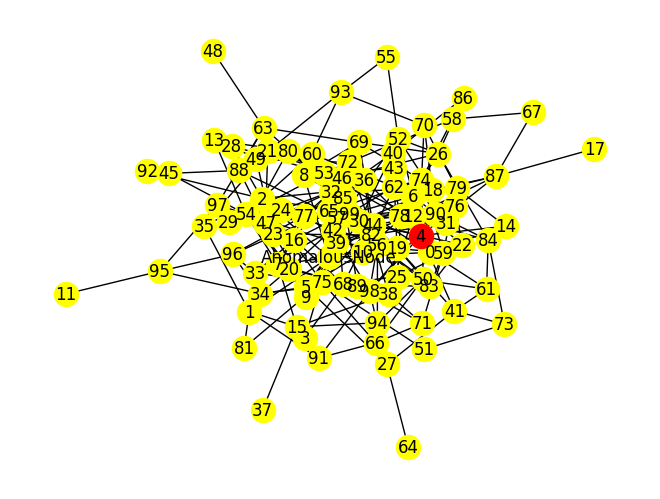

In [36]:

# Find Anomalies or Outliers

# Anomaly detection in graphs involves identifying nodes or edges that deviate significantly from the norm.
# Example: Finding Anomalous Nodes

import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.erdos_renyi_graph(100, 0.05)

# Add an anomalous node
G.add_node("AnomalousNode")
G.add_edges_from([("AnomalousNode", n) for n in range(10)])

# Compute centrality measures
centrality = nx.degree_centrality(G)

# Identify outliers based on centrality
threshold = 0.1  # Arbitrary threshold for example
anomalies = [node for node, score in centrality.items() if score > threshold]

print("Anomalous nodes:", anomalies)

# Visualize the graph and anomalies
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='yellow', with_labels=True)
nx.draw_networkx_nodes(G, pos, nodelist=anomalies, node_color='red')
plt.show()


In [ ]:

# The anomalies (in red) are identified based on the degree centrality measure. Degree centrality measures how many connections a node has 
# relative to the other nodes in the network. Nodes with higher degree centrality are considered more central or important within the network.

# In this example, the anomaly detection process is based on the assumption that nodes with a degree centrality score higher than a certain 
# threshold (in this case, 0.1) are anomalies. Anomalies are nodes that have significantly more connections than the average node in the network.

# However, the concept of an anomaly can be subjective and depends on the specific context of the network and the problem being analyzed.


Shortest path from New York to Los Angeles: ['New York', 'Boston', 'Denver', 'San Francisco', 'Los Angeles']
Shortest path length: 14 units


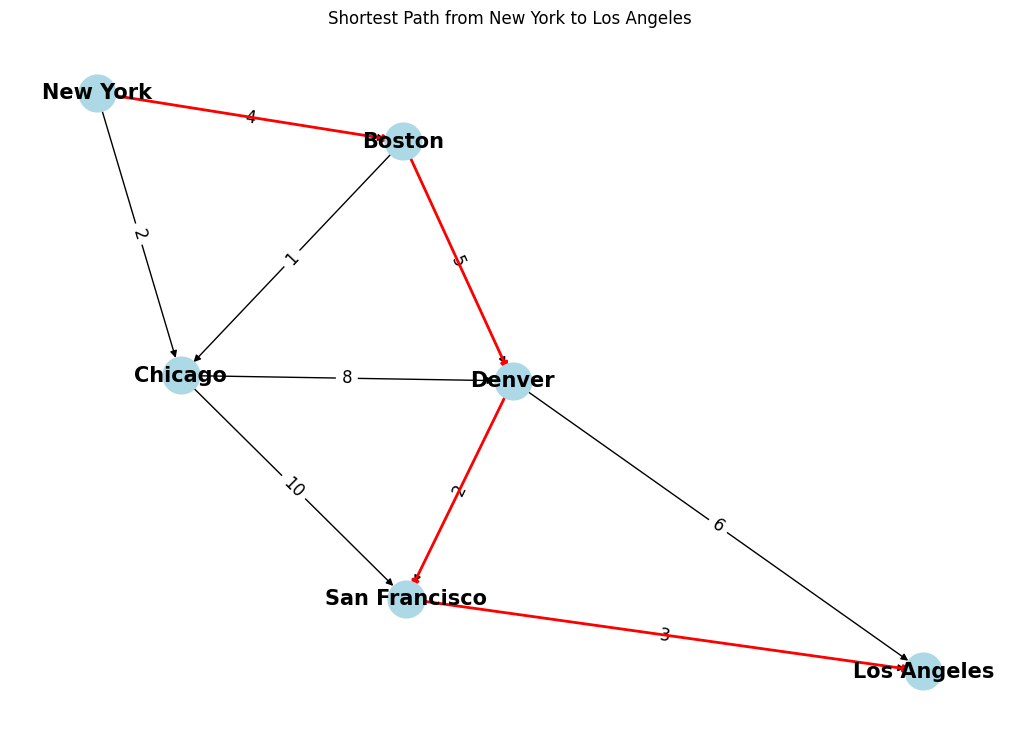

In [40]:

# Shortest Path in a Transportation Network

# Let's consider a transportation network represented as a graph. The nodes represent cities, and the edges represent the roads connecting 
# these cities with weights corresponding to the distance between them. Our goal is to find the shortest path between two cities.

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (cities)
cities = ["New York", "Boston", "Chicago", "Denver", "San Francisco", "Los Angeles"]
G.add_nodes_from(cities)

# Add weighted edges (roads with distances)
edges = [
    ("New York", "Boston", 4),
    ("New York", "Chicago", 2),
    ("Boston", "Chicago", 1),
    ("Boston", "Denver", 5),
    ("Chicago", "Denver", 8),
    ("Chicago", "San Francisco", 10),
    ("Denver", "San Francisco", 2),
    ("Denver", "Los Angeles", 6),
    ("San Francisco", "Los Angeles", 3)
]
G.add_weighted_edges_from(edges)

# Function to find and plot the shortest path
def find_and_plot_shortest_path(G, source, target):
    # Find the shortest path using Dijkstra's algorithm
    shortest_path = nx.dijkstra_path(G, source, target)
    shortest_path_length = nx.dijkstra_path_length(G, source, target)
    
    # Print the shortest path and its length
    print(f"Shortest path from {source} to {target}: {shortest_path}")
    print(f"Shortest path length: {shortest_path_length} units")
    
    # Plot the graph
    pos = nx.spring_layout(G)  # Layout for visual representation
    plt.figure(figsize=(10, 7))
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=15, font_weight='bold')
    
    # Draw the edges with weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    
    # Highlight the shortest path
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    plt.title(f"Shortest Path from {source} to {target}")
    plt.show()

# Find and plot the shortest path from city 'New York' to city 'Los Angeles'
find_and_plot_shortest_path(G, source='New York', target='Los Angeles')


Shortest path from New York to Los Angeles: ['New York', 'Los Angeles']
Shortest path length: 3944.42 kilometers


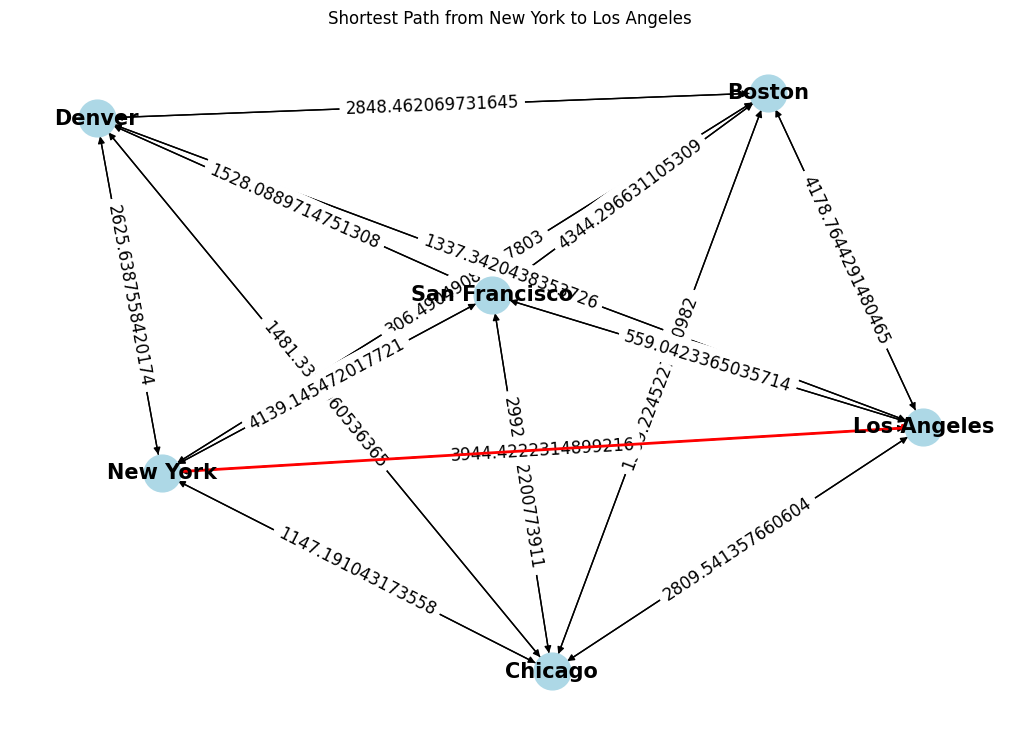

In [41]:

# Here is another version of the concept we just saw above, but with latitude and longitude coordinates.

import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Create a directed graph
G = nx.DiGraph()

# Add nodes (cities) with latitude and longitude coordinates
cities = {
    "New York": (40.7128, -74.0060),
    "Boston": (42.3601, -71.0589),
    "Chicago": (41.8781, -87.6298),
    "Denver": (39.7392, -104.9903),
    "San Francisco": (37.7749, -122.4194),
    "Los Angeles": (34.0522, -118.2437)
}
G.add_nodes_from(cities.keys())

# Calculate distances between cities and add weighted edges
for city1, coord1 in cities.items():
    for city2, coord2 in cities.items():
        if city1 != city2:
            distance = geodesic(coord1, coord2).kilometers  # Compute distance in kilometers
            G.add_edge(city1, city2, weight=distance)

# Function to find and plot the shortest path
def find_and_plot_shortest_path(G, source, target):
    # Find the shortest path using Dijkstra's algorithm
    shortest_path = nx.dijkstra_path(G, source, target)
    shortest_path_length = nx.dijkstra_path_length(G, source, target)
    
    # Print the shortest path and its length
    print(f"Shortest path from {source} to {target}: {shortest_path}")
    print(f"Shortest path length: {shortest_path_length:.2f} kilometers")
    
    # Plot the graph
    pos = nx.spring_layout(G)  # Layout for visual representation
    plt.figure(figsize=(10, 7))
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=15, font_weight='bold')
    
    # Draw the edges with weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    
    # Highlight the shortest path
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    plt.title(f"Shortest Path from {source} to {target}")
    plt.show()

# Find and plot the shortest path from city 'New York' to city 'Los Angeles'
find_and_plot_shortest_path(G, source='New York', target='Los Angeles')


In [ ]:

# Graph analysis was created by Euler in 1736. It has come quite a long way since then! Graph analysis is a well-established field with deep 
# historical roots, and it continues to evolve with advancements in technology and the increasing availability of large-scale data. It provides 
# powerful tools for understanding and leveraging the relationships and structures within complex networks.
